<a href="https://colab.research.google.com/github/sunil-karki/EHR/blob/main/WRL_EHR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Coursework on module "Work Related Learning(WRL)"
----
###  _WRL Task on "US Electronic Health Record(EHR data)"_
\
#### Islington College, Kathmandu
#### London Metropolitan University
\
##### Prepared by:  Sunil Karki
##### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(MSc. IT - Data Analytics)
#####               LondonMet ID: 21039796
#####               College ID: np01ms7a210029

In [1]:
# Install necessary packages for WRL

# Install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 31 kB/s 
     |████████████████████████████████| 199 kB 56.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=c59c5d44d8a5c0d8a117ba3ec977b4bd0489ada565b40f545596c9ae4f01a121
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
# Import SparkSession
from pyspark.sql import SparkSession
# Import Spark functions
from pyspark.sql.functions import trim, col, floor, datediff, current_timestamp, \
                                  to_date, lit, when, round, udf, count, sum
# Import IntegerType method from sql.types
from pyspark.sql.types import IntegerType
# Import pyspark.pandas for visual plots
import pyspark.pandas as ps

# Import seaborn for visualization
import seaborn as sns

In [3]:
# Create a Spark Session
spark = SparkSession.builder.appName("WRL Test").master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [4]:
spark.version

'3.3.1'

In [5]:
# Setting seaborn configs
sns.set(rc = {'figure.figsize':(14,5)})
sns.set(color_codes=True)
sns.set(style="darkgrid", palette="pastel")

Import all source files
-------------------------------------------------------
Source data: Synthetic Patient Generation Realistic Health Data

Link:-  https://synthetichealth.github.io/synthea/

In [6]:
#RDD_allergies = sc.textFile("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/allergies.csv")
df_allergies = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/allergies.csv")
df_careplans = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/careplans.csv")
df_conditions = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/conditions.csv")
df_devices = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/devices.csv")
df_encounters = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/encounters.csv")
df_img_studies = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/imaging_studies.csv")
df_immunizations = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/immunizations.csv")
df_medications = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/medications.csv")
df_observations = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/observations.csv")
df_organizations = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/organizations.csv")
df_patients = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/patients.csv")
df_pyr_transitions = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/payer_transitions.csv")
df_pyr = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/payers.csv")
df_procedures = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/procedures.csv")
df_providers = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/providers.csv")
df_supplies = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/supplies.csv")

In [7]:
#df_patients = spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Islington/Year 2 Sem 3/WRL/Work/synthea_sample_data_csv_apr2020/csv/patients.csv")

In [8]:
df_supplies

DataFrame[DATE: string, PATIENT: string, ENCOUNTER: string, CODE: string, DESCRIPTION: string, QUANTITY: string]

In [9]:
# Check if spark.read created an RDD, sparksession or dataframe
from pyspark.sql import DataFrame
from pyspark.rdd import RDD

print(isinstance(df_supplies, DataFrame)) # It's a dataframe
type(df_patients) # Imported dataframes are of type : pyspark.sql.dataframe.DataFrame

True


pyspark.sql.dataframe.DataFrame

In [10]:
df_allergies.show(2)
rows = df_allergies.count()
print(f"Rows count : {rows}")

+----------+----+--------------------+--------------------+---------+-----------------+
|     START|STOP|             PATIENT|           ENCOUNTER|     CODE|      DESCRIPTION|
+----------+----+--------------------+--------------------+---------+-----------------+
|1982-10-25|null|76982e06-f8b8-450...|b896bf40-8b72-42b...|300916003|    Latex allergy|
|1982-10-25|null|76982e06-f8b8-450...|b896bf40-8b72-42b...|300913006|Shellfish allergy|
+----------+----+--------------------+--------------------+---------+-----------------+
only showing top 2 rows

Rows count : 597


In [11]:
df_careplans.show(2)
rows = df_careplans.count()
print(f"Rows count : {rows}")

+--------------------+----------+----------+--------------------+--------------------+--------+-------------------+----------+--------------------+
|                  Id|     START|      STOP|             PATIENT|           ENCOUNTER|    CODE|        DESCRIPTION|REASONCODE|   REASONDESCRIPTION|
+--------------------+----------+----------+--------------------+--------------------+--------+-------------------+----------+--------------------+
|d2500b8c-e830-433...|2010-01-23|2012-01-23|034e9e3b-2def-455...|d0c40d10-8d87-447...|53950000|Respiratory therapy|  10509002|Acute bronchitis ...|
|07d9ddd8-dfa1-4e4...|2011-05-13|2011-08-02|10339b10-3cd1-4ac...|e1ab4933-07a1-49f...|53950000|Respiratory therapy|  10509002|Acute bronchitis ...|
+--------------------+----------+----------+--------------------+--------------------+--------+-------------------+----------+--------------------+
only showing top 2 rows

Rows count : 3483


In [12]:
df_conditions.show(2)
rows = df_conditions.count()
print(f"Rows count : {rows}")

+----------+----------+--------------------+--------------------+---------+--------------------+
|     START|      STOP|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|
+----------+----------+--------------------+--------------------+---------+--------------------+
|2001-05-01|      null|1d604da9-9a81-4ba...|8f104aa7-4ca9-447...| 40055000|Chronic sinusitis...|
|2011-08-09|2011-08-16|8d4c4326-e9de-4f4...|9d35ec9f-352a-462...|444814009|Viral sinusitis (...|
+----------+----------+--------------------+--------------------+---------+--------------------+
only showing top 2 rows

Rows count : 8376


In [13]:
df_devices.show(2)
rows = df_devices.count()
print(f"Rows count : {rows}")

+--------------------+----+--------------------+--------------------+--------+--------------------+--------------------+
|               START|STOP|             PATIENT|           ENCOUNTER|    CODE|         DESCRIPTION|                 UDI|
+--------------------+----+--------------------+--------------------+--------+--------------------+--------------------+
|2001-07-04T08:42:44Z|null|d49f748f-928d-40e...|2500b8bd-dc98-44e...|72506001|Implantable defib...|(01)6767798860646...|
|2010-10-24T05:28:51Z|null|e05dd037-e45f-434...|83cda5b1-4653-432...|72506001|Implantable defib...|(01)2018059525834...|
+--------------------+----+--------------------+--------------------+--------+--------------------+--------------------+
only showing top 2 rows

Rows count : 78


In [14]:
#An interaction between a patient and healthcare provider(s) for the purpose of providing healthcare service(s) or assessing the health status of a patient.
df_encounters.show(2)
rows = df_encounters.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+--------------------+
|                  Id|               START|                STOP|             PATIENT|        ORGANIZATION|            PROVIDER|               PAYER|ENCOUNTERCLASS|     CODE|         DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|   REASONDESCRIPTION|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+--------------------+
|d0c40d10-8d87-447...|2010-01-23T17:45:28Z|2010-01-23T18:10:28Z|034e9e3b-2def-455...|e002090d-4e92-300...|e6283e46-fd81-361...|6e2f1a2d-27bd-370...|    ambulatory|

In [15]:
df_img_studies.show(2)
rows = df_img_studies.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------------+--------------------+--------------------+--------------------+
|                  Id|                DATE|             PATIENT|           ENCOUNTER|BODYSITE_CODE|BODYSITE_DESCRIPTION|MODALITY_CODE|MODALITY_DESCRIPTION|            SOP_CODE|     SOP_DESCRIPTION|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------------+--------------------+--------------------+--------------------+
|d3e49b38-7634-441...|2014-07-08T15:35:36Z|b58731cc-2d8b-4c2...|3a36836d-da25-4e7...|     40983000|                 Arm|           DX| Digital Radiography|1.2.840.10008.5.1...|Digital X-Ray Ima...|
|46baf530-4941-40a...|2014-01-22T18:58:37Z|2ffe9369-24e4-414...|33b71e4b-0690-4fe...|     40983000|                 Arm|           DX| Digital Radiography|1.2.840.10008.5.1...|Digital X-Ray Ima...|
+---------

In [16]:
df_immunizations.show(2)
print(f"Rows count : {df_immunizations.count()}")

+--------------------+--------------------+--------------------+----+--------------------+---------+
|                DATE|             PATIENT|           ENCOUNTER|CODE|         DESCRIPTION|BASE_COST|
+--------------------+--------------------+--------------------+----+--------------------+---------+
|2010-07-27T12:58:08Z|10339b10-3cd1-4ac...|dae2b7cb-1316-4b7...| 140|Influenza  season...|   140.52|
|2010-11-20T03:04:34Z|f5dcd418-09fe-4a2...|7ff86631-0378-4bf...| 140|Influenza  season...|   140.52|
+--------------------+--------------------+--------------------+----+--------------------+---------+
only showing top 2 rows

Rows count : 15478


In [17]:
df_medications.show(2)
rows = df_medications.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------------------+---------+--------------+---------+---------+----------+-----------------+
|               START|                STOP|             PATIENT|               PAYER|           ENCOUNTER|  CODE|         DESCRIPTION|BASE_COST|PAYER_COVERAGE|DISPENSES|TOTALCOST|REASONCODE|REASONDESCRIPTION|
+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------------------+---------+--------------+---------+---------+----------+-----------------+
|2010-05-05T00:26:23Z|2011-04-30T00:26:23Z|8d4c4326-e9de-4f4...|b1c428d6-4f07-31e...|1e0d6b0e-1711-4a2...|389221|Etonogestrel 68 M...|   677.08|          0.00|       12|  8124.96|      null|             null|
|2011-04-30T00:26:23Z|2012-04-24T00:26:23Z|8d4c4326-e9de-4f4...|b1c428d6-4f07-31e...|6aa37300-d1b4-48e...|389221|Etonogestrel 68 M...|   624.09|          0.00|     

In [18]:
df_observations.show(2)
rows = df_observations.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+-------+--------------------+-----+-------+-------+
|                DATE|             PATIENT|           ENCOUNTER|   CODE|         DESCRIPTION|VALUE|  UNITS|   TYPE|
+--------------------+--------------------+--------------------+-------+--------------------+-----+-------+-------+
|2012-01-23T17:45:28Z|034e9e3b-2def-455...|e88bc3a9-007c-405...| 8302-2|         Body Height|193.3|     cm|numeric|
|2012-01-23T17:45:28Z|034e9e3b-2def-455...|e88bc3a9-007c-405...|72514-3|Pain severity - 0...|  2.0|{score}|numeric|
+--------------------+--------------------+--------------------+-------+--------------------+-----+-------+-------+
only showing top 2 rows

Rows count : 299697


In [19]:
df_organizations.show(2)
rows = df_organizations.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+----------+-----+-----+---------+----------+----------+------------------+-----------+
|                  Id|                NAME|             ADDRESS|      CITY|STATE|  ZIP|      LAT|       LON|     PHONE|           REVENUE|UTILIZATION|
+--------------------+--------------------+--------------------+----------+-----+-----+---------+----------+----------+------------------+-----------+
|ef58ea08-d883-395...|HEALTHALLIANCE HO...|    60 HOSPITAL ROAD|LEOMINSTER|   MA|01453|42.520838|-71.770876|9784662000|198002.28000000442|       1557|
|69176529-fd1f-3b3...|MOUNT AUBURN HOSP...|330 MOUNT AUBURN ...| CAMBRIDGE|   MA|02138|42.375967|-71.118275|6174923500| 288569.1700000008|       2296|
+--------------------+--------------------+--------------------+----------+-----+-----+---------+----------+----------+------------------+-----------+
only showing top 2 rows

Rows count : 1119


In [20]:
df_patients.show(2)
rows = df_patients.count()
print(f"Rows count : {rows}")

+--------------------+----------+---------+-----------+---------+----------+------+---------------+--------+------+------+-------+-----+-----------+------+--------------------+--------------------+----------+-------------+----------------+-----+-----------------+------------------+-------------------+-------------------+
|                  Id| BIRTHDATE|DEATHDATE|        SSN|  DRIVERS|  PASSPORT|PREFIX|          FIRST|    LAST|SUFFIX|MAIDEN|MARITAL| RACE|  ETHNICITY|GENDER|          BIRTHPLACE|             ADDRESS|      CITY|        STATE|          COUNTY|  ZIP|              LAT|               LON|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|
+--------------------+----------+---------+-----------+---------+----------+------+---------------+--------+------+------+-------+-----+-----------+------+--------------------+--------------------+----------+-------------+----------------+-----+-----------------+------------------+-------------------+-------------------+
|1d604da9-9a81-4ba...|1989-05-2

In [21]:
df_pyr_transitions.show(2)
rows = df_pyr_transitions.count()
print(f"Rows count : {rows}")

+--------------------+----------+--------+--------------------+---------+
|             PATIENT|START_YEAR|END_YEAR|               PAYER|OWNERSHIP|
+--------------------+----------+--------+--------------------+---------+
|1d604da9-9a81-4ba...|      1989|    1998|b1c428d6-4f07-31e...| Guardian|
|034e9e3b-2def-455...|      1983|    2001|6e2f1a2d-27bd-370...| Guardian|
+--------------------+----------+--------+--------------------+---------+
only showing top 2 rows

Rows count : 3801


In [22]:
df_pyr.show(2)
rows = df_pyr.count()
print(f"Rows count : {rows}")

+--------------------+-------------+------------------+---------+-------------------+-----+--------------+--------------+----------------+----------+------------------+--------------------+-------------------+---------------------+------------------+--------------------+---------------------+-----------------------+----------------+-------------------+-------------+
|                  Id|         NAME|           ADDRESS|     CITY|STATE_HEADQUARTERED|  ZIP|         PHONE|AMOUNT_COVERED|AMOUNT_UNCOVERED|   REVENUE|COVERED_ENCOUNTERS|UNCOVERED_ENCOUNTERS|COVERED_MEDICATIONS|UNCOVERED_MEDICATIONS|COVERED_PROCEDURES|UNCOVERED_PROCEDURES|COVERED_IMMUNIZATIONS|UNCOVERED_IMMUNIZATIONS|UNIQUE_CUSTOMERS|           QOLS_AVG|MEMBER_MONTHS|
+--------------------+-------------+------------------+---------+-------------------+-----+--------------+--------------+----------------+----------+------------------+--------------------+-------------------+---------------------+------------------+------------

In [23]:
df_procedures.show(2)
rows = df_procedures.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+---------+--------------------+---------+----------+-----------------+
|                DATE|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|BASE_COST|REASONCODE|REASONDESCRIPTION|
+--------------------+--------------------+--------------------+---------+--------------------+---------+----------+-----------------+
|2011-04-30T00:26:23Z|8d4c4326-e9de-4f4...|6aa37300-d1b4-48e...|169553002|Insertion of subc...| 14896.56|      null|             null|
|2010-07-27T12:58:08Z|10339b10-3cd1-4ac...|dae2b7cb-1316-4b7...|430193006|Medication Reconc...|   726.51|      null|             null|
+--------------------+--------------------+--------------------+---------+--------------------+---------+----------+-----------------+
only showing top 2 rows

Rows count : 34981


In [24]:
df_providers.show(2)
rows = df_providers.count()
print(f"Rows count : {rows}")

+--------------------+--------------------+--------------------+------+----------------+--------------------+----------+-----+-----+---------+----------+-----------+
|                  Id|        ORGANIZATION|                NAME|GENDER|      SPECIALITY|             ADDRESS|      CITY|STATE|  ZIP|      LAT|       LON|UTILIZATION|
+--------------------+--------------------+--------------------+------+----------------+--------------------+----------+-----+-----+---------+----------+-----------+
|3421aa75-dec7-378...|ef58ea08-d883-395...|   Tomas436 Sauer652|     M|GENERAL PRACTICE|    60 HOSPITAL ROAD|LEOMINSTER|   MA|01453|42.520838|-71.770876|       1557|
|c9b3c857-2e24-320...|69176529-fd1f-3b3...|Suzette512 Monaha...|     F|GENERAL PRACTICE|330 MOUNT AUBURN ...| CAMBRIDGE|   MA|02138|42.375967|-71.118275|       2296|
+--------------------+--------------------+--------------------+------+----------------+--------------------+----------+-----+-----+---------+----------+-----------+
only

In [25]:
df_supplies.show(2)
rows = df_supplies.count()
print(f"Rows count : {rows}")

+----+-------+---------+----+-----------+--------+
|DATE|PATIENT|ENCOUNTER|CODE|DESCRIPTION|QUANTITY|
+----+-------+---------+----+-----------+--------+
+----+-------+---------+----+-----------+--------+

Rows count : 0


-------------

**Cleaning/Preprocessing the data**

----------------

In [26]:
# Change name of 'Id'' in each dataframe to avoid ambiguity during analysis
df_careplans = df_careplans.withColumnRenamed("Id","CAREPLAN_ID")
df_encounters = df_encounters.withColumnRenamed("Id","ENCOUNTERS_ID")
df_img_studies = df_img_studies.withColumnRenamed("Id","IMGSTUDIES_ID")
df_organizations = df_organizations.withColumnRenamed("Id","ORG_ID")
df_patients = df_patients.withColumnRenamed("Id","PATIENT_ID")
df_pyr = df_pyr.withColumnRenamed("Id","PYR_ID")
df_providers = df_providers.withColumnRenamed("Id","PROV_ID")
df_careplans.printSchema()

root
 |-- CAREPLAN_ID: string (nullable = true)
 |-- START: string (nullable = true)
 |-- STOP: string (nullable = true)
 |-- PATIENT: string (nullable = true)
 |-- ENCOUNTER: string (nullable = true)
 |-- CODE: string (nullable = true)
 |-- DESCRIPTION: string (nullable = true)
 |-- REASONCODE: string (nullable = true)
 |-- REASONDESCRIPTION: string (nullable = true)



In [27]:
#df_patients = df_patients.withColumnRenamed("Id","PATIENT_ID")

In [28]:
df_patients.printSchema()

root
 |-- PATIENT_ID: string (nullable = true)
 |-- BIRTHDATE: string (nullable = true)
 |-- DEATHDATE: string (nullable = true)
 |-- SSN: string (nullable = true)
 |-- DRIVERS: string (nullable = true)
 |-- PASSPORT: string (nullable = true)
 |-- PREFIX: string (nullable = true)
 |-- FIRST: string (nullable = true)
 |-- LAST: string (nullable = true)
 |-- SUFFIX: string (nullable = true)
 |-- MAIDEN: string (nullable = true)
 |-- MARITAL: string (nullable = true)
 |-- RACE: string (nullable = true)
 |-- ETHNICITY: string (nullable = true)
 |-- GENDER: string (nullable = true)
 |-- BIRTHPLACE: string (nullable = true)
 |-- ADDRESS: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- COUNTY: string (nullable = true)
 |-- ZIP: string (nullable = true)
 |-- LAT: string (nullable = true)
 |-- LON: string (nullable = true)
 |-- HEALTHCARE_EXPENSES: string (nullable = true)
 |-- HEALTHCARE_COVERAGE: string (nullable = true)



In [29]:
# Checking any duplicate patient entry in df_patients
temp_df = df_patients.groupBy("PATIENT_ID").count()
temp_df.filter("PATIENT_ID > 1").show()

+----------+-----+
|PATIENT_ID|count|
+----------+-----+
+----------+-----+



Conclusion: This states that there are unique patient per each record in the df_patients dataframe.

No cleaning needed for duplicate record.

In [30]:
df_encounters.printSchema()

root
 |-- ENCOUNTERS_ID: string (nullable = true)
 |-- START: string (nullable = true)
 |-- STOP: string (nullable = true)
 |-- PATIENT: string (nullable = true)
 |-- ORGANIZATION: string (nullable = true)
 |-- PROVIDER: string (nullable = true)
 |-- PAYER: string (nullable = true)
 |-- ENCOUNTERCLASS: string (nullable = true)
 |-- CODE: string (nullable = true)
 |-- DESCRIPTION: string (nullable = true)
 |-- BASE_ENCOUNTER_COST: string (nullable = true)
 |-- TOTAL_CLAIM_COST: string (nullable = true)
 |-- PAYER_COVERAGE: string (nullable = true)
 |-- REASONCODE: string (nullable = true)
 |-- REASONDESCRIPTION: string (nullable = true)



In [31]:
# Finding distinct 'DESCRIPTION' vaccine applied to patients.
df_immunizations.select("DESCRIPTION").distinct().show(20, False)

+--------------------------------------------------+
|DESCRIPTION                                       |
+--------------------------------------------------+
|IPV                                               |
|Influenza  seasonal  injectable  preservative free|
|Tdap                                              |
|pneumococcal polysaccharide vaccine  23 valent    |
|Hep A  adult                                      |
|Hep B  adult                                      |
|HPV  quadrivalent                                 |
|Hep B  adolescent or pediatric                    |
|meningococcal MCV4P                               |
|Td (adult) preservative free                      |
|Hep A  ped/adol  2 dose                           |
|DTaP                                              |
|rotavirus  monovalent                             |
|varicella                                         |
|Pneumococcal conjugate PCV 13                     |
|zoster                                       

In [32]:
# Updating values in 'DESCRIPTION' which seems similar/same. Removing long names with properly identifiable names for later analysis.
df_immunizations = df_immunizations.withColumn("DESCRIPTION", \
                 when(df_immunizations.DESCRIPTION == "pneumococcal polysaccharide vaccine  23 valent","Pneumococcal vaccine") \
                .when(df_immunizations.DESCRIPTION == "Pneumococcal conjugate PCV 13","Pneumococcal conjugate") \
                .when(df_immunizations.DESCRIPTION == "Td (adult) preservative free","Diphtheria & Tetanus") \
                .when(df_immunizations.DESCRIPTION == "Influenza  seasonal  injectable  preservative free","Influenza vaccine") \
                .when(df_immunizations.DESCRIPTION == "Hep A  adult","Hep A") \
                .when(df_immunizations.DESCRIPTION == "Hep B  adult","Hep B") \
                .when(df_immunizations.DESCRIPTION == "Hep B  adolescent or pediatric","Hep B") \
                .when(df_immunizations.DESCRIPTION == "Hep A  ped/adol  2 dose","Hep A") \
                .when(df_immunizations.DESCRIPTION == "Hep B  adult","Hep B") \
                .when(df_immunizations.DESCRIPTION == "meningococcal MCV4P","Meningococcal") \
                .when(df_immunizations.DESCRIPTION == "rotavirus  monovalent","Rotavirus") \
                .when(df_immunizations.DESCRIPTION == "Hib (PRP-OMP)","Hib") \
                .when(df_immunizations.DESCRIPTION == "HPV  quadrivalent","HPV") \
                .otherwise(df_immunizations.DESCRIPTION))
df_immunizations.select("DESCRIPTION").distinct().show(20, False)

+----------------------+
|DESCRIPTION           |
+----------------------+
|Diphtheria & Tetanus  |
|Influenza vaccine     |
|IPV                   |
|Pneumococcal conjugate|
|Rotavirus             |
|Tdap                  |
|HPV                   |
|Hep A                 |
|DTaP                  |
|Pneumococcal vaccine  |
|varicella             |
|Hib                   |
|zoster                |
|Meningococcal         |
|Hep B                 |
|MMR                   |
+----------------------+



In [33]:
# Renaming the similar column names in each dataframe to avoid ambiguity. 
df_immunizations = df_immunizations.withColumnRenamed("DESCRIPTION","IMMUNIZ_DESCRIPTION")
df_encounters = df_encounters.withColumnRenamed("DESCRIPTION","ENC_DESCRIPTION")

In [34]:
# Converting field type from string to numeric for df_patients
df_patients = df_patients.withColumn("HEALTHCARE_EXPENSES",df_patients.HEALTHCARE_EXPENSES.cast(IntegerType())) \
                         .withColumn("HEALTHCARE_COVERAGE",df_patients.HEALTHCARE_COVERAGE.cast(IntegerType()))

In [35]:
# Adding new field to df_patients called 'AGE'
# If DEATHDATE is NOT null Then AGE = DEATHDATE - BIRTHDATE 
# Else AGE = 2020/04/01 - BIRTHDATE

df_patients = df_patients.withColumn("AGE", \
                                     when( col("DEATHDATE").isNotNull() , floor(datediff(col("DEATHDATE"), col("BIRTHDATE"))/365.25) ) \
                                     .otherwise( floor(datediff(to_date(lit("2020-04-01")), col("BIRTHDATE"))/365.25) ) \
                                    )

**Note:** The source data is from April 2020. So calculating patient's age w.r.t this date.

In [36]:
df_patients.filter("AGE > 100").select("AGE").distinct().show()

+---+
|AGE|
+---+
|110|
|104|
|106|
|105|
|108|
|102|
+---+



**Conclusion:** There are patient who are with age above 100. It could also mean their deathdate might not have been recorded.

In [37]:
# Adding new field to df_patients called 'DEATH' to determine if patient
df_patients = df_patients.withColumn("DEATH", \
                                     when( col("DEATHDATE").isNotNull() , "Y" ) \
                                     .otherwise( "N") \
                                    )
#df_patients.filter("DEATH == 'Y'").show()

In [38]:
# Adding new field to df_patients called 'age_category' to group the age of patients
age_group = udf(lambda age: '< 10' if age < 10 else \
                       '10-19' if (age >= 10 and age < 20) else \
                       '20-29' if (age >= 20 and age < 30) else \
                       '30-39' if (age >= 30 and age < 40) else \
                       '40-49' if (age >= 40 and age < 50) else \
                       '50-59' if (age >= 50 and age < 60) else \
                       '60-69' if (age >= 60 and age < 70) else \
                       '70-79' if (age >= 70 and age < 80) else \
                       '80-89' if (age >= 80 and age < 90) else \
                       '90-99' if (age >= 90 and age < 100) else \
                       '100+'  if (age >= 100) else '')

df_patients = df_patients.withColumn('AGE_CATEGORY', age_group(df_patients.AGE))
df_patients.show(5)

+--------------------+----------+---------+-----------+---------+----------+------+---------------+-------------+------+-------------+-------+-----+-----------+------+--------------------+--------------------+----------+-------------+----------------+-----+------------------+------------------+-------------------+-------------------+---+-----+------------+
|          PATIENT_ID| BIRTHDATE|DEATHDATE|        SSN|  DRIVERS|  PASSPORT|PREFIX|          FIRST|         LAST|SUFFIX|       MAIDEN|MARITAL| RACE|  ETHNICITY|GENDER|          BIRTHPLACE|             ADDRESS|      CITY|        STATE|          COUNTY|  ZIP|               LAT|               LON|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|AGE|DEATH|AGE_CATEGORY|
+--------------------+----------+---------+-----------+---------+----------+------+---------------+-------------+------+-------------+-------+-----+-----------+------+--------------------+--------------------+----------+-------------+----------------+-----+------------------+------

In [39]:
df_pyr.printSchema()

root
 |-- PYR_ID: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- ADDRESS: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE_HEADQUARTERED: string (nullable = true)
 |-- ZIP: string (nullable = true)
 |-- PHONE: string (nullable = true)
 |-- AMOUNT_COVERED: string (nullable = true)
 |-- AMOUNT_UNCOVERED: string (nullable = true)
 |-- REVENUE: string (nullable = true)
 |-- COVERED_ENCOUNTERS: string (nullable = true)
 |-- UNCOVERED_ENCOUNTERS: string (nullable = true)
 |-- COVERED_MEDICATIONS: string (nullable = true)
 |-- UNCOVERED_MEDICATIONS: string (nullable = true)
 |-- COVERED_PROCEDURES: string (nullable = true)
 |-- UNCOVERED_PROCEDURES: string (nullable = true)
 |-- COVERED_IMMUNIZATIONS: string (nullable = true)
 |-- UNCOVERED_IMMUNIZATIONS: string (nullable = true)
 |-- UNIQUE_CUSTOMERS: string (nullable = true)
 |-- QOLS_AVG: string (nullable = true)
 |-- MEMBER_MONTHS: string (nullable = true)



In [40]:
# Converting field type from string to numeric for df_encounter
df_encounters = df_encounters.withColumn("BASE_ENCOUNTER_COST", df_encounters.BASE_ENCOUNTER_COST.cast(IntegerType())) \
                             .withColumn("TOTAL_CLAIM_COST", df_encounters.TOTAL_CLAIM_COST.cast(IntegerType())) \
                             .withColumn("PAYER_COVERAGE", df_encounters.PAYER_COVERAGE.cast(IntegerType()))

In [41]:
# Converting field type from string to numeric for df_pyr
df_pyr = df_pyr.withColumn("AMOUNT_COVERED", df_pyr.AMOUNT_COVERED.cast(IntegerType())) \
               .withColumn("AMOUNT_UNCOVERED", df_pyr.AMOUNT_UNCOVERED.cast(IntegerType())) \
               .withColumn("REVENUE", df_pyr.REVENUE.cast(IntegerType()))

In [42]:
# Selecting selective columns like ID, NAME, EXPENSES for patients
df_patients = df_patients.select("PATIENT_ID","SSN","DRIVERS","FIRST","LAST","MAIDEN","GENDER","AGE","DEATH","AGE_CATEGORY","HEALTHCARE_EXPENSES","HEALTHCARE_COVERAGE")
df_patients.show(5)

+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|
+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+
|1d604da9-9a81-4ba...|999-76-6866|S99984236|José Eduardo181|     Gómez206|         null|     M| 30|    N|       30-39|             271227|               1334|
|034e9e3b-2def-455...|999-73-5361|S99962402|        Milo271|      Feil794|         null|     M| 36|    N|       30-39|             793946|               3204|
|10339b10-3cd1-4ac...|999-27-3385|S99972682|      Jayson808|     Fadel536|         null|     M| 27|    N|       20-29|             574111|               2606|
|8d4c4326-e9de-4f4...|999-85-4926|S99974448|  

-----------

**Initial Data Analysis**

-------------------------

In [43]:
# Convert df_patients dataframe to pandas dataframe
pd_temp_df = df_patients.select("AGE").toPandas()

# Describe count, mean, std deviation, min, max using pyspark
df_patients.describe(['AGE']).show()

+-------+------------------+
|summary|               AGE|
+-------+------------------+
|  count|              1171|
|   mean| 41.07002561912895|
| stddev|24.338535761027114|
|    min|                 0|
|    max|               110|
+-------+------------------+



In [44]:
# Summary statistics of columns: AGE in df_patients dataframe (Using pandas df)
pd_temp_df[["AGE"]].describe()

,AGE
count,1171.000000
mean,41.070026
std,24.338536
min,0.000000
25%,21.000000
50%,41.000000
75%,60.000000
max,110.000000


In [45]:
# Filtering patients with age above 100+
df_patients.filter("AGE > 100").show()

+--------------------+-----------+---------+-----------+-------------+--------------+------+---+-----+------------+-------------------+-------------------+
|          PATIENT_ID|        SSN|  DRIVERS|      FIRST|         LAST|        MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|
+--------------------+-----------+---------+-----------+-------------+--------------+------+---+-----+------------+-------------------+-------------------+
|f1921fc3-fdfc-441...|999-71-4454|S99968762|Sharleen176|     Kulas532|    Rolfson709|     F|110|    N|        100+|             495271|              39995|
|6abdc54d-098e-47d...|999-68-6750|S99953863| Enedina292|Macejkovic424|Schamberger479|     F|104|    N|        100+|            1512751|              43528|
|6d8fdec1-d77d-417...|999-32-3912|S99964540|  Santos184|       Fay398|          null|     M|108|    N|        100+|             155173|              16761|
|475b2a8b-19a0-451...|999-38-4849|S99959961|  Manual570| Kertzma

In [46]:
# Checking distinct values in df_payer payers dataframe
df_pyr.select("NAME").distinct().show()

+--------------------+
|                NAME|
+--------------------+
|        Cigna Health|
|        NO_INSURANCE|
|              Humana|
|               Aetna|
|Blue Cross Blue S...|
|       Dual Eligible|
|            Medicaid|
|            Medicare|
|    UnitedHealthcare|
|              Anthem|
+--------------------+



Conclusion: \
1. Payer dataframe has 10 rows with 10 distinct payer name, through which we can conclude that AMOUNT_COVERED and AMOUNT_UNCOVERED are amount reported by each payers. Now we can work on the 'Payer coverage report'.

In [47]:
rows = df_immunizations.select("PATIENT").distinct().count() #1169
print(f"No. of patient who took immunization: {rows}")
rows = df_patients.select("PATIENT_ID").distinct().count() #1171
print(f"No. of patient in EHR record: {rows}")

No. of patient who took immunization: 1169
No. of patient in EHR record: 1171


Conclusion: \
There are 1171 - 1169 = 2 who have not taken any immunizations till date or not recorded to take any immunization.

   -----------

**Exploratory Data Analysis**

------------

In [48]:
temp_df = df_patients.groupBy("AGE_CATEGORY").avg("HEALTHCARE_EXPENSES", "HEALTHCARE_COVERAGE").orderBy("AGE_CATEGORY")
temp_df.show()

+------------+------------------------+------------------------+
|AGE_CATEGORY|avg(HEALTHCARE_EXPENSES)|avg(HEALTHCARE_COVERAGE)|
+------------+------------------------+------------------------+
|       10-19|       291299.4013157895|      3382.4473684210525|
|        100+|      1429707.3636363635|       51664.90909090909|
|       20-29|       498243.7261146497|        5086.15923566879|
|       30-39|       641683.0222222222|       6656.303703703704|
|       40-49|       840298.3092105263|       9630.644736842105|
|       50-59|      1051205.9144736843|       17393.58552631579|
|       60-69|      1221377.5194805195|      17692.766233766233|
|       70-79|      1338649.2771084337|       26864.77108433735|
|       80-89|      1457951.2285714287|      28733.428571428572|
|       90-99|      1137745.5789473683|      110519.42105263157|
|        < 10|       95333.48760330578|       1623.206611570248|
+------------+------------------------+------------------------+



[Text(0.5, 1.0, 'Age-Group comparing their average health expenses and average health coverage')]

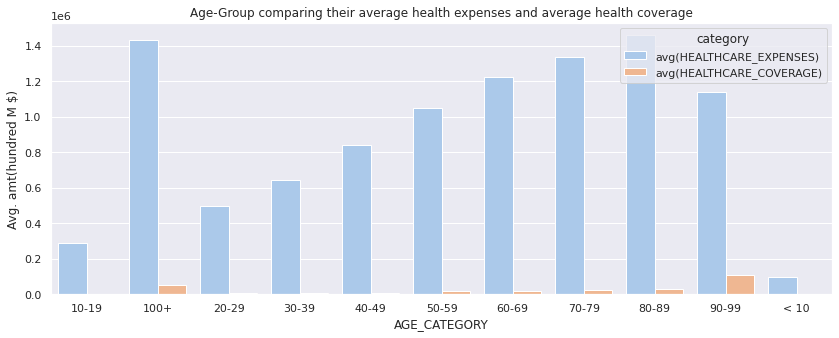

In [49]:
pd_temp_df = temp_df.toPandas()

# Barplot for age-group comparing their average health expenses and average health coverage
sns.barplot(data=pd_temp_df.melt(id_vars='AGE_CATEGORY',
                                  value_name='Avg. amt(hundred M $)', var_name='category'),
            x='AGE_CATEGORY', y='Avg. amt(hundred M $)', hue='category')  \
            .set(title='Age-Group comparing their average health expenses and average health coverage')

**Conclusion:** Average healthcare expenses is higher than the average healthcare coverage in all age groups.

In [50]:
#import pyspark.pandas as ps
#ps.melt(temp_RDD)

In [51]:
#data=pd_temp_df.melt(id_vars='AGE_CATEGORY',  value_name='Avg. amt(hundred M $)', var_name='category')
#data

In [52]:
df_encounters.orderBy("ENCOUNTERS_ID").show(5)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+-----------------+
|       ENCOUNTERS_ID|               START|                STOP|             PATIENT|        ORGANIZATION|            PROVIDER|               PAYER|ENCOUNTERCLASS|     CODE|     ENC_DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|REASONDESCRIPTION|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+-----------------+
|0000d0b7-937c-498...|1994-09-07T04:48:12Z|1994-09-07T05:03:12Z|714b9c18-783d-4f5...|5259a506-b80b-3ed...|3a65bdb3-12b2-324...|d47b3510-2895-3b7...|      wellness|162673000

In [53]:
# patients x encounters
pat_enc = df_patients.join(df_encounters, trim(df_patients.PATIENT_ID) == trim(df_encounters.PATIENT))
pat_enc.show(5)
print(f"Rows count : {pat_enc.count()}")

+--------------------+-----------+---------+---------------+--------+------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|    LAST|MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|       ENCOUNTERS_ID|               START|                STOP|             PATIENT|        ORGANIZATION|            PROVIDER|               PAYER|ENCOUNTERCLASS|     CODE|     ENC_DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|   REASONDESCRIPTION|
+--------------------+-----------+---------+---------------+--------+------+------+---+-----+------------+-------------------+-------------------+------

In [54]:
# Find distinct PATIENT, ORGANIZATION, PROVIDER, PAYER
temp_df = pat_enc.select('PATIENT').distinct()
#temp_RDD.show(5)
print(f"Distinct PATIENT Rows count : {temp_df.count()}")
temp_df = pat_enc.select('ORGANIZATION').distinct()
print(f"Distinct ORGANIZATION Rows count : {temp_df.count()}")
temp_df = pat_enc.select('PROVIDER').distinct()
print(f"Distinct PROVIDER Rows count : {temp_df.count()}")
temp_df = pat_enc.select('PAYER').distinct()
print(f"Distinct PAYER Rows count : {temp_df.count()}")

Distinct PATIENT Rows count : 1171
Distinct ORGANIZATION Rows count : 1103
Distinct PROVIDER Rows count : 1104
Distinct PAYER Rows count : 10


In [57]:
temp_RDD = pat_enc.groupBy("REASONCODE").sum("BASE_ENCOUNTER_COST", "TOTAL_CLAIM_COST", "PAYER_COVERAGE", "HEALTHCARE_EXPENSES", "HEALTHCARE_COVERAGE")
temp_RDD.show(3)
print(f"Rows count : {temp_RDD.count()}")

+----------+------------------------+---------------------+-------------------+------------------------+------------------------+
|REASONCODE|sum(BASE_ENCOUNTER_COST)|sum(TOTAL_CLAIM_COST)|sum(PAYER_COVERAGE)|sum(HEALTHCARE_EXPENSES)|sum(HEALTHCARE_COVERAGE)|
+----------+------------------------+---------------------+-------------------+------------------------+------------------------+
| 301011002|                    7482|                 7482|               2582|                51873681|                  574753|
| 359817006|                    1419|                 1419|                695|                 7867530|                  256877|
|  26929004|                    5676|                 5676|               3647|                58494741|                 1036959|
+----------+------------------------+---------------------+-------------------+------------------------+------------------------+
only showing top 3 rows

Rows count : 81


In [58]:
#temp_RDD = pat_enc.groupBy("ENCOUNTERCLASS").sum("BASE_ENCOUNTER_COST", "TOTAL_CLAIM_COST", "PAYER_COVERAGE", "HEALTHCARE_EXPENSES", "HEALTHCARE_COVERAGE")
temp_RDD = pat_enc.groupBy("ENCOUNTERCLASS").sum("BASE_ENCOUNTER_COST", "TOTAL_CLAIM_COST", "PAYER_COVERAGE")
temp_RDD.show(7)
print(f"Rows count : {temp_RDD.count()}")

+--------------+------------------------+---------------------+-------------------+
|ENCOUNTERCLASS|sum(BASE_ENCOUNTER_COST)|sum(TOTAL_CLAIM_COST)|sum(PAYER_COVERAGE)|
+--------------+------------------------+---------------------+-------------------+
|      wellness|                 2464674|              2464674|            1768169|
|    outpatient|                 1161387|              1161387|             265231|
|     emergency|                  269610|               269610|             122801|
|     inpatient|                  215106|               215106|              81045|
|    urgentcare|                  306117|               306117|                  0|
|    ambulatory|                 2442744|              2442744|            1063619|
+--------------+------------------------+---------------------+-------------------+

Rows count : 6


[Text(0.5, 1.0, 'EncounterClass comparing their sum encounter_cost, claim_cost, payer_coverage')]

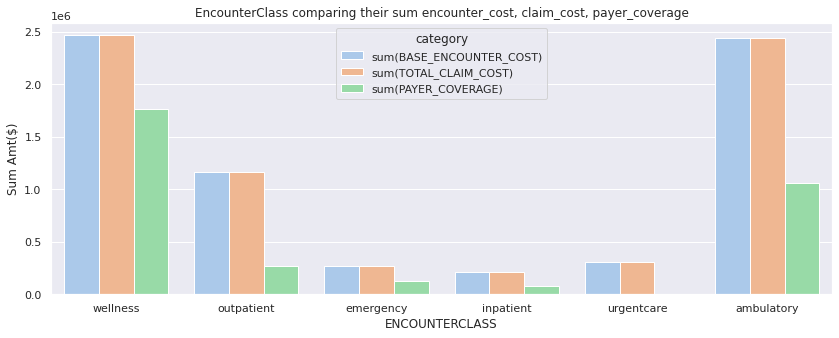

In [59]:
pd_temp_RDD = temp_RDD.toPandas()

# Barplot for EncounterClass comparing their sum encounter_cost, claim_cost, payer_coverage
sns.barplot(data=pd_temp_RDD.melt(id_vars='ENCOUNTERCLASS',
                                  value_name='Sum Amt($)', var_name='category'),
            x='ENCOUNTERCLASS', y='Sum Amt($)', hue='category')  \
            .set(title='EncounterClass comparing their sum encounter_cost, claim_cost, payer_coverage')

**Conclusion:**
\
1. The payer coverage is less than the encounter cost and claim cost.
2. The base encounter cost is always same as the total claim cost.

In [60]:
#temp_RDD = pat_enc.groupBy("ENCOUNTERCLASS").avg("BASE_ENCOUNTER_COST", "TOTAL_CLAIM_COST", "PAYER_COVERAGE", "HEALTHCARE_EXPENSES", "HEALTHCARE_COVERAGE")
temp_RDD = pat_enc.groupBy("ENCOUNTERCLASS").avg("BASE_ENCOUNTER_COST", "TOTAL_CLAIM_COST", "PAYER_COVERAGE")
temp_RDD.show(7)
print(f"Rows count : {temp_RDD.count()}")

+--------------+------------------------+---------------------+-------------------+
|ENCOUNTERCLASS|avg(BASE_ENCOUNTER_COST)|avg(TOTAL_CLAIM_COST)|avg(PAYER_COVERAGE)|
+--------------+------------------------+---------------------+-------------------+
|      wellness|                   129.0|                129.0|  92.54522139641998|
|    outpatient|                   129.0|                129.0|  29.46029101410641|
|     emergency|                   129.0|                129.0|  58.75645933014354|
|     inpatient|      117.03264417845485|   117.03264417845485| 44.094124047878125|
|    urgentcare|                   129.0|                129.0|                0.0|
|    ambulatory|                   129.0|                129.0|  56.16914871144909|
+--------------+------------------------+---------------------+-------------------+

Rows count : 6


[Text(0.5, 1.0, 'EncounterClass comparing their average encounter_cost, claim_cost, payer_coverage')]

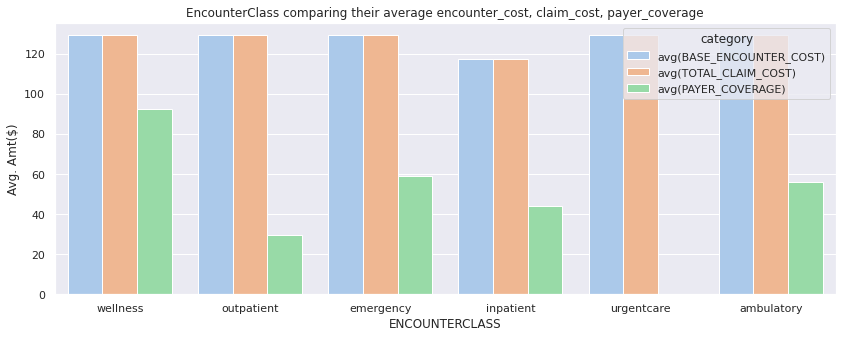

In [61]:
pd_temp_RDD = temp_RDD.toPandas()

# Barplot for EncounterClass comparing their average encounter_cost, claim_cost, payer_coverage
sns.barplot(data=pd_temp_RDD.melt(id_vars='ENCOUNTERCLASS',
                                  value_name='Avg. Amt($)', var_name='category'),
            x='ENCOUNTERCLASS', y='Avg. Amt($)', hue='category')  \
            .set(title='EncounterClass comparing their average encounter_cost, claim_cost, payer_coverage')

**Conclusion:**
\
1. The average payer coverage is less than the average encounter cost and average claim cost.
2. The average base encounter cost is always same as the average total claim cost.

Conclusion: \
1. Payer dataframe has 10 rows with 10 distinct payer name, through which we can conclude that AMOUNT_COVERED and AMOUNT_UNCOVERED are amount reported by each payers. Now we can work on the 'Payer coverage report'.

In [62]:
# Finding payer coverage report (finding sum)
payer_coverage_detail = pat_enc.groupBy("PAYER").sum("BASE_ENCOUNTER_COST", "TOTAL_CLAIM_COST", "PAYER_COVERAGE")
payer_coverage_detail = payer_coverage_detail.join(df_pyr, trim(payer_coverage_detail.PAYER) == trim(df_pyr.PYR_ID))
payer_coverage_detail = payer_coverage_detail.select(col("NAME").alias("PAYER"), "sum(BASE_ENCOUNTER_COST)", "sum(TOTAL_CLAIM_COST)", "sum(PAYER_COVERAGE)", "AMOUNT_COVERED", "AMOUNT_UNCOVERED") \
                                             .filter("PAYER != 'NO_INSURANCE'")
# "REVENUE")
payer_coverage_detail.show()

+--------------------+------------------------+---------------------+-------------------+--------------+----------------+
|               PAYER|sum(BASE_ENCOUNTER_COST)|sum(TOTAL_CLAIM_COST)|sum(PAYER_COVERAGE)|AMOUNT_COVERED|AMOUNT_UNCOVERED|
+--------------------+------------------------+---------------------+-------------------+--------------+----------------+
|        Cigna Health|                  485034|               485034|             303516|        909661|          635040|
|Blue Cross Blue S...|                  849628|               849628|             434614|       2741717|         1431463|
|              Anthem|                  293217|               293217|             224826|        526943|          258995|
|            Medicare|                 1244101|              1244101|             793710|       4756720|          890394|
|       Dual Eligible|                   92079|                92079|              30496|        141676|          119449|
|              Humana|  

[Text(0.5, 1.0, 'Payer coverage detail visualization')]

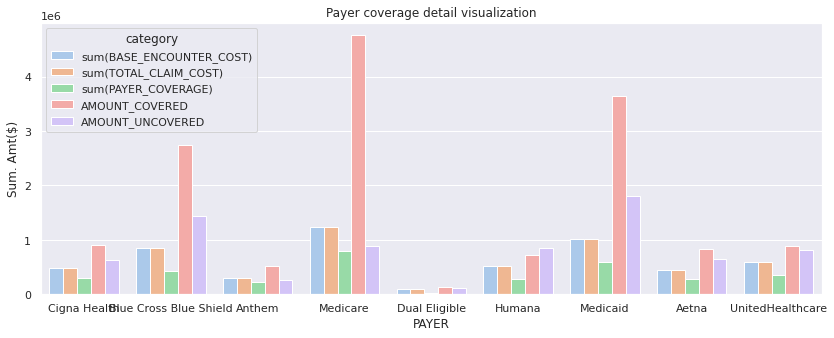

In [63]:
pd_temp_RDD = payer_coverage_detail.toPandas()

# Barplot for Payer coverage detail visualization
sns.barplot(data=pd_temp_RDD.melt(id_vars='PAYER',
                                  value_name='Sum. Amt($)', var_name='category'),
            x='PAYER', y='Sum. Amt($)', hue='category')  \
            .set(title='Payer coverage detail visualization')

**Conclusion:**
\
1. Payer named "Medicare" claims to cover more than any other payers, which amounts to $4,756,720
2. Base encounter cost is always the same as the total claim cost for each payers.
3. Payer coverage(i.e. what payer actually pay/cover) is less than what is usually claimed. This is same for every payers.
4. Payer named "Dual Eligible" is the smallest payer which has less amount of coverage and claim.

In [64]:
# Finding payer coverage report (finding average)
payer_coverage_detail = pat_enc.groupBy("PAYER").avg("BASE_ENCOUNTER_COST", "TOTAL_CLAIM_COST", "PAYER_COVERAGE")
payer_coverage_detail = payer_coverage_detail.join(df_pyr, trim(payer_coverage_detail.PAYER) == trim(df_pyr.PYR_ID))
payer_coverage_detail = payer_coverage_detail.select(col("NAME").alias("PAYER"), "avg(BASE_ENCOUNTER_COST)", "avg(TOTAL_CLAIM_COST)", "avg(PAYER_COVERAGE)", "AMOUNT_COVERED", "AMOUNT_UNCOVERED") \
                                             .filter("PAYER != 'NO_INSURANCE'")
# "REVENUE")
payer_coverage_detail.show()

+--------------------+------------------------+---------------------+-------------------+--------------+----------------+
|               PAYER|avg(BASE_ENCOUNTER_COST)|avg(TOTAL_CLAIM_COST)|avg(PAYER_COVERAGE)|AMOUNT_COVERED|AMOUNT_UNCOVERED|
+--------------------+------------------------+---------------------+-------------------+--------------+----------------+
|        Cigna Health|       128.7928836962294|    128.7928836962294|  80.59373340414233|        909661|          635040|
|Blue Cross Blue S...|       128.6535433070866|    128.6535433070866|   65.8107207752877|       2741717|         1431463|
|              Anthem|                   129.0|                129.0|  98.91157061152661|        526943|          258995|
|            Medicare|      128.98921721099015|   128.98921721099015|  82.29237947122861|       4756720|          890394|
|       Dual Eligible|      128.78181818181818|   128.78181818181818|  42.65174825174825|        141676|          119449|
|              Humana|  

[Text(0.5, 1.0, 'Payer coverage detail visualization')]

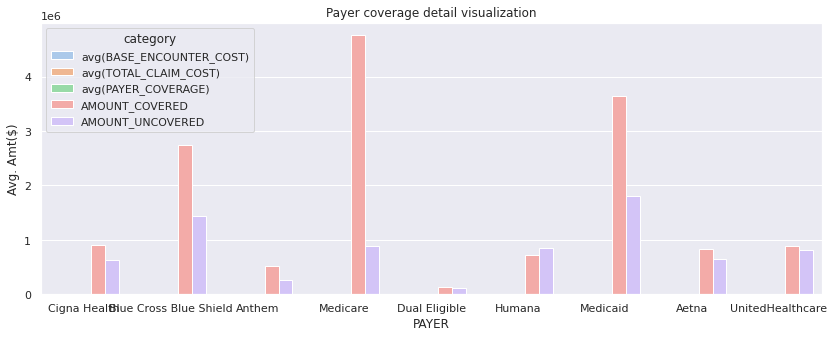

In [65]:
pd_temp_df = payer_coverage_detail.toPandas()

# Barplot for Payer coverage detail visualization
sns.barplot(data=pd_temp_df.melt(id_vars='PAYER',
                                  value_name='Avg. Amt($)', var_name='category'),
            x='PAYER', y='Avg. Amt($)', hue='category')  \
            .set(title='Payer coverage detail visualization')

Conclusion: \
1. Average amount covered(reported in encouters data) is dwarfed by the amount covered reported by the payers.
2. Payers seems to have covered the amount looking at the difference between AMOUNT_COVERED vs AMOUNT_UNCOVERED. Humana is an exception.

In [66]:
# Finding payer coverage report with encounterclass
payer_coverage_detail_2 = pat_enc.groupBy("PAYER", "ENCOUNTERCLASS").avg("TOTAL_CLAIM_COST", "PAYER_COVERAGE")
payer_coverage_detail_2 = payer_coverage_detail_2.join(df_pyr, trim(payer_coverage_detail_2.PAYER) == trim(df_pyr.PYR_ID))
#payer_coverage_detail_2.show()
payer_coverage_detail_2 = payer_coverage_detail_2.select(col("NAME").alias("PAYERS"), "ENCOUNTERCLASS", "avg(TOTAL_CLAIM_COST)", "avg(PAYER_COVERAGE)")
#, "REVENUE")
payer_coverage_detail_2.orderBy(col("PAYERS"), col("ENCOUNTERCLASS")).show()

rows = payer_coverage_detail_2.count()
print(f"Rows count : {rows}")

+--------------------+--------------+---------------------+-------------------+
|              PAYERS|ENCOUNTERCLASS|avg(TOTAL_CLAIM_COST)|avg(PAYER_COVERAGE)|
+--------------------+--------------+---------------------+-------------------+
|               Aetna|    ambulatory|                129.0|            63.8976|
|               Aetna|     emergency|                129.0|  61.25714285714286|
|               Aetna|     inpatient|   116.56521739130434|  50.17391304347826|
|               Aetna|    outpatient|                129.0|                0.0|
|               Aetna|    urgentcare|                129.0|                0.0|
|               Aetna|      wellness|                129.0| 102.79361702127659|
|              Anthem|     emergency|                129.0|                0.0|
|              Anthem|     inpatient|                129.0|                0.0|
|              Anthem|    outpatient|                129.0|                0.0|
|              Anthem|    urgentcare|   

In [67]:
pat_immuniz = df_patients.join(df_immunizations, trim(df_patients.PATIENT_ID) == trim(df_immunizations.PATIENT))
print(f"Rows count : {pat_immuniz.count()}") #15478
pat_immuniz = pat_immuniz.join(df_encounters, trim(pat_immuniz.ENCOUNTER) == trim(df_encounters.ENCOUNTERS_ID) )
#pat_immuniz.orderBy(col("PATIENT_ID"), col("DATE")).show(5)
print(f"Rows count : {pat_immuniz.count()}") #15478
pat_immuniz.select("ENCOUNTERCLASS").distinct().show(5)

pat_immuniz.filter(trim(col("ENCOUNTERCLASS")) == "emergency").show(5)

Rows count : 15478
Rows count : 15478
+--------------+
|ENCOUNTERCLASS|
+--------------+
|      wellness|
|    outpatient|
|     emergency|
|    urgentcare|
+--------------+

+--------------------+-----------+---------+---------+--------------+------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+----+-------------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+--------+-------------------+-------------------+----------------+--------------+----------+-----------------+
|          PATIENT_ID|        SSN|  DRIVERS|    FIRST|          LAST|MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|                DATE|             PATIENT|           ENCOUNTER|CODE|IMMUNIZ_DESCRIPTION|BASE_COST|       ENCOUNTERS_ID|               START|                STOP| 

In [68]:
# Finding number of immunization made for each vaccine by patient.
temp_df = pat_immuniz.select("IMMUNIZ_DESCRIPTION") \
                      .groupBy("IMMUNIZ_DESCRIPTION") \
                      .agg(count("IMMUNIZ_DESCRIPTION").alias("immunization_count"))

# Convert pyspark.sql.dataframe.DataFrame to pyspark.pandas.frame.DataFrame
temp_df = ps.DataFrame( temp_df ).set_index('IMMUNIZ_DESCRIPTION')
# temp_df
fig = temp_df.immunization_count.plot.pie()
fig.update_layout(
    title_text='<b>No.(%) of times immunization done</b>',
    title_font=dict(size=16),
    title_x=0.45,
)

Conclusion: \
1. Influenza vaccine is the most highly taken/used vaccine by patients.
2. Pneumococcal vaccine is the least taken/used vaccine by patients.

In [69]:
# Grouping the patient with their Social Security Number (SSN), AGE and GENDER.
# This will remove encounter of any single patient in the dataframe.
# Summing the healthcare expenses by the patient till date.
#
# Note: Social Security Number (SSN) is always unique for every patient/citizen in the United States of America.
#
temp_df = pat_immuniz.select("SSN", "AGE", "GENDER", "HEALTHCARE_EXPENSES") \
                      .groupBy("SSN", "AGE", "GENDER") \
                      .agg(sum("HEALTHCARE_EXPENSES").alias("HEALTHCARE_EXPENSES"))

print("Unique patient(SSN) count: " + str( temp_df.count() ) ) # 1169
print("Count(Rows) of patients x encounters: " + str( pat_immuniz.count() ) ) # 15478

temp_df = temp_df.select("AGE", "GENDER", "HEALTHCARE_EXPENSES")
temp_df.show()

Unique patient(SSN) count: 1169
Count(Rows) of patients x encounters: 15478
+---+------+-------------------+
|AGE|GENDER|HEALTHCARE_EXPENSES|
+---+------+-------------------+
| 29|     F|            5186120|
| 35|     F|            8343214|
| 21|     F|             300170|
| 59|     F|           14586682|
|  3|     M|            2466558|
| 74|     M|            2196372|
| 31|     F|            4526874|
| 41|     F|            3742520|
| 40|     M|            7419112|
| 30|     F|            4665576|
| 75|     M|           17365140|
| 49|     M|              75024|
| 19|     F|            6837088|
| 81|     F|           17244144|
| 13|     M|            5880320|
| 27|     M|            5166999|
| 80|     M|           17774570|
| 52|     F|           14486290|
| 66|     F|           18427097|
| 58|     F|            2368145|
+---+------+-------------------+
only showing top 20 rows



[Text(0, 0.5, 'HEALTHCARE_EXPENSES (in M)'),
 Text(0.5, 1.0, 'Scatterplot for healthcare expense, age and gender')]

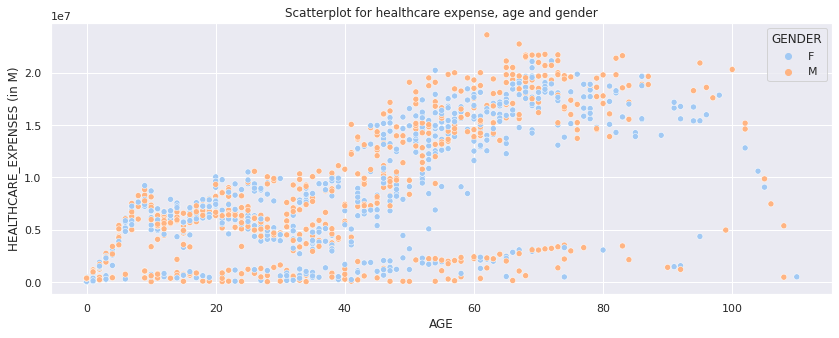

In [70]:
# temp_df = ps.DataFrame( temp_df )
#
# Pyspark scatterplot does not support hue
#
# fig = temp_df.plot.scatter(x='AGE', y='HEALTHCARE_EXPENSES')
# fig.update_layout(
#     template="plotly_dark", 
#     title_text='<b>Scatterplot for healthcare expense, age and gender</b>',
#     title_font=dict(size=16),
#     title_x=0.45
#     ) 
sns.scatterplot(data=temp_df.toPandas(), 
                x='AGE', y='HEALTHCARE_EXPENSES', hue='GENDER'
                ) \
                .set(title = 'Scatterplot for healthcare expense, age and gender', \
                     ylabel='HEALTHCARE_EXPENSES (in M)')

Conclusion: \
1. Patient with age from 45 to 85 had high healthcare expenses. \
2. From the scatterplot, it could also be concluded that the Male patient make the highest healthcare expenses than the female.\
3. Among the age group 0-40, male and female had the same healthcare expenses.
4. Healthcare expenses for patient below 45 is upto \$1M while for patient with age 45+ is upto \$ 2M

In [ ]:
pat_immuniz.show(3)

+--------------------+-----------+-------+-------+----------+------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+----+--------------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------------+-------------------+----------------+--------------+----------+-----------------+
|          PATIENT_ID|        SSN|DRIVERS|  FIRST|      LAST|MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|                DATE|             PATIENT|           ENCOUNTER|CODE| IMMUNIZ_DESCRIPTION|BASE_COST|       ENCOUNTERS_ID|               START|                STOP|             PATIENT|        ORGANIZATION|            PROVIDER|               PAYER|ENCOUNTERCLASS|     CODE|     ENC_DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASON

-------------------

In [71]:
# Grouping the patient with their Social Security Number (SSN), AGE and GENDER.
# This will remove encounter of any single patient in the dataframe.
# Summing the healthcare expenses by the patient till date.
#
# Note: Social Security Number (SSN) is always unique for every patient/citizen in the United States of America.
#
temp_df = pat_immuniz.select("SSN", "AGE", "GENDER", "HEALTHCARE_COVERAGE") \
                      .groupBy("SSN", "AGE", "GENDER") \
                      .agg(sum("HEALTHCARE_COVERAGE").alias("HEALTHCARE_COVERAGE"))

print("Unique patient(SSN) count: " + str( temp_df.count() ) ) # 1169
print("Count(Rows) of patients x encounters: " + str( pat_immuniz.count() ) ) # 15478

temp_df = temp_df.select("AGE", "GENDER", "HEALTHCARE_COVERAGE")
# temp_df.show()

Unique patient(SSN) count: 1169
Count(Rows) of patients x encounters: 15478


[Text(0, 0.5, 'HEALTHCARE_COVERAGE (in M)'),
 Text(0.5, 1.0, 'Scatterplot for healthcare coverage, age and gender')]

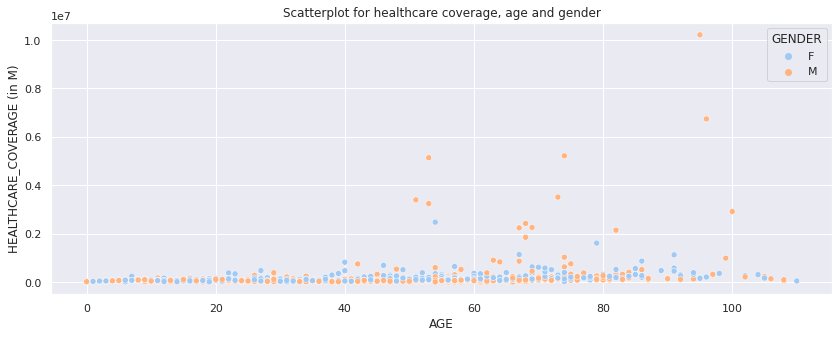

In [72]:
sns.scatterplot(data=temp_df.toPandas(), 
                x='AGE', y='HEALTHCARE_COVERAGE', hue='GENDER'
                ) \
                .set(title = 'Scatterplot for healthcare coverage, age and gender', \
                     ylabel='HEALTHCARE_COVERAGE (in M)')

Conclusion: \
1. Health coverage by payers to patients of every age group is same.
2. Health coverage for every patient(all age group) is below $ 100K.
3. There is a huge difference between patient healthcare expenses and coverage.

In [73]:
temp_df = pat_immuniz.select("SSN", "AGE", "ENCOUNTERCLASS", "HEALTHCARE_EXPENSES") \
                      .groupBy("SSN", "AGE", "ENCOUNTERCLASS") \
                      .agg(sum("HEALTHCARE_EXPENSES").alias("HEALTHCARE_EXPENSES"))

print("Unique patient(SSN) count: " + str( temp_df.count() ) ) # 1169
print("Count(Rows) of patients x encounters: " + str( pat_immuniz.count() ) ) # 15478

temp_df = temp_df.select("AGE", "ENCOUNTERCLASS", "HEALTHCARE_EXPENSES")
# temp_df.show()

Unique patient(SSN) count: 1804
Count(Rows) of patients x encounters: 15478
+---+--------------+-------------------+
|AGE|ENCOUNTERCLASS|HEALTHCARE_EXPENSES|
+---+--------------+-------------------+
| 16|      wellness|            7133376|
| 22|      wellness|            7683102|
| 70|    outpatient|            1512466|
|  0|      wellness|             376720|
| 46|      wellness|           13144911|
| 43|    outpatient|            1168629|
| 56|      wellness|            1264431|
| 74|     emergency|             814839|
| 54|      wellness|           12532560|
| 44|      wellness|            4554765|
| 33|    urgentcare|             811702|
| 18|      wellness|             543159|
| 42|    urgentcare|            2296084|
| 65|    urgentcare|            1373697|
| 69|      wellness|            1894424|
| 84|    urgentcare|            1412705|
| 38|      wellness|             825368|
| 45|      wellness|            5610840|
| 84|      wellness|            1942690|
| 51|      wellness|  

[Text(0, 0.5, 'HEALTHCARE_EXPENSES (in M)'),
 Text(0.5, 1.0, 'Scatterplot for healthcare expenses, age and encounterclass')]

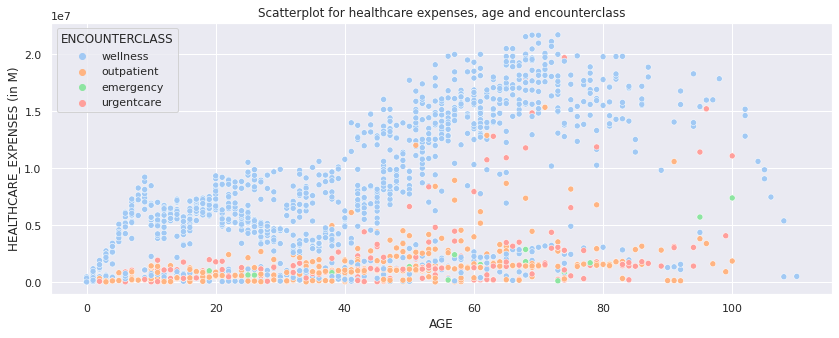

In [74]:
sns.scatterplot(data=temp_df.toPandas(), 
                x='AGE', y='HEALTHCARE_EXPENSES', hue='ENCOUNTERCLASS'
                ) \
                .set(title = 'Scatterplot for healthcare expenses, age and encounterclass', \
                     ylabel='HEALTHCARE_EXPENSES (in M)')

Conclusion: \
1. Patient of all age group spend a lot on their wellness
2. Outpatient care slightly increases after the age of 40.
3. Emergency and urgentcare are always less below \$ 300K
4. Patient below age of 40 spend less on wellness (below \$ 1M). Whereas, Patient above age of 40 spend more on wellness (max \$ 2M)

In [75]:

temp_df = pat_immuniz.select("SSN", "AGE", "ENCOUNTERCLASS", "HEALTHCARE_COVERAGE") \
                      .groupBy("SSN", "AGE", "ENCOUNTERCLASS") \
                      .agg(sum("HEALTHCARE_COVERAGE").alias("HEALTHCARE_COVERAGE"))

print("Unique patient(SSN) count: " + str( temp_df.count() ) ) # 1169
print("Count(Rows) of patients x encounters: " + str( pat_immuniz.count() ) ) # 15478

temp_df = temp_df.select("AGE", "ENCOUNTERCLASS", "HEALTHCARE_COVERAGE")
temp_df.show()

Unique patient(SSN) count: 1804
Count(Rows) of patients x encounters: 15478
+---+--------------+-------------------+
|AGE|ENCOUNTERCLASS|HEALTHCARE_COVERAGE|
+---+--------------+-------------------+
| 16|      wellness|              43744|
| 22|      wellness|             130508|
| 70|    outpatient|               9244|
|  0|      wellness|              10965|
| 46|      wellness|             264134|
| 43|    outpatient|               2944|
| 56|      wellness|             150668|
| 74|     emergency|             236079|
| 54|      wellness|              70700|
| 44|      wellness|              15670|
| 33|    urgentcare|               6333|
| 18|      wellness|              51921|
| 42|    urgentcare|               5888|
| 65|    urgentcare|              13259|
| 69|      wellness|             274352|
| 84|    urgentcare|              15725|
| 38|      wellness|              23877|
| 45|      wellness|              39378|
| 84|      wellness|             214240|
| 51|      wellness|  

[Text(0, 0.5, 'HEALTHCARE_COVERAGE (in M)'),
 Text(0.5, 1.0, 'Scatterplot for healthcare coverage, age and encounterclass')]

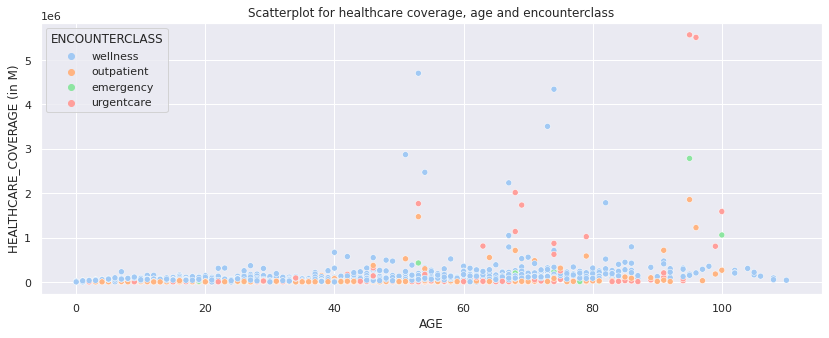

In [76]:
sns.scatterplot(data=temp_df.toPandas(), 
                x='AGE', y='HEALTHCARE_COVERAGE', hue='ENCOUNTERCLASS'
                ) \
                .set(title = 'Scatterplot for healthcare coverage, age and encounterclass', \
                     ylabel='HEALTHCARE_COVERAGE (in M)')

Conclusion: \
1. Payers coverage on every age group is the same.
2. While patient pay more on their wellness and less in urgentcare, payers pay their patient the same amount.

In [77]:

temp_df = pat_immuniz.select("SSN", "AGE", "IMMUNIZ_DESCRIPTION", "HEALTHCARE_EXPENSES") \
                      .groupBy("SSN", "AGE", "IMMUNIZ_DESCRIPTION") \
                      .agg(sum("HEALTHCARE_EXPENSES").alias("HEALTHCARE_EXPENSES"))

print("Unique patient(SSN) count: " + str( temp_df.count() ) ) # 1169
print("Count(Rows) of patients x encounters: " + str( pat_immuniz.count() ) ) # 15478

temp_df = temp_df.select("AGE", "IMMUNIZ_DESCRIPTION", "HEALTHCARE_EXPENSES")
temp_df.show()

Unique patient(SSN) count: 4641
Count(Rows) of patients x encounters: 15478
+---+--------------------+-------------------+
|AGE| IMMUNIZ_DESCRIPTION|HEALTHCARE_EXPENSES|
+---+--------------------+-------------------+
| 29|               Hep B|            1296530|
| 26|   Influenza vaccine|            6084560|
| 70|Pneumococcal vaccine|            1512466|
| 12|                Tdap|             254245|
| 47|Diphtheria & Tetanus|            1039725|
| 24|   Influenza vaccine|            3214710|
|  3|           Rotavirus|             190376|
| 12|       Meningococcal|             319572|
| 67|Pneumococcal conj...|            1513683|
|  7|           Rotavirus|             322670|
|  7|   Influenza vaccine|            1129345|
|  7|               Hep A|             322670|
|  6|           Rotavirus|             354484|
| 22|                 HPV|              67719|
| 71|Pneumococcal vaccine|            1672490|
| 46|               Hep A|             295552|
| 46|   Influenza vaccine|     

[Text(0, 0.5, 'HEALTHCARE_EXPENSES (in M)'),
 Text(0.5, 1.0, 'Scatterplot for healthcare expenses, age and immunization on')]

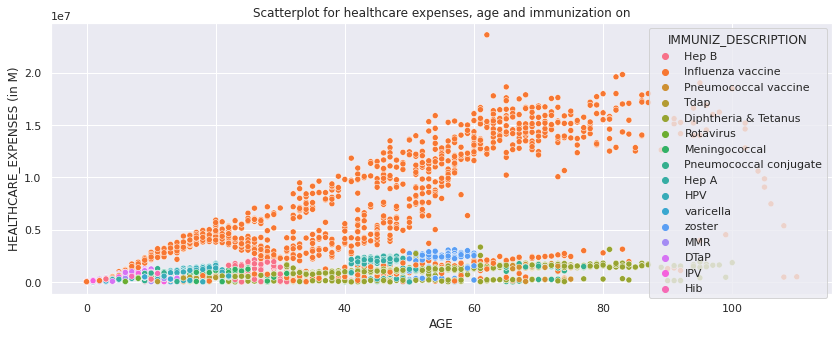

In [78]:
sns.scatterplot(data=temp_df.toPandas(), 
                x='AGE', y='HEALTHCARE_EXPENSES', hue='IMMUNIZ_DESCRIPTION'
                ) \
                .set(title = 'Scatterplot for healthcare expenses, age and immunization on', \
                     ylabel='HEALTHCARE_EXPENSES (in M)')

Conclusion: \
1. Patients with ages above 5, spend more on Influenza vaccine. This expenses rises with age upto \$2M.
2. After age of 5, patient spend same amount (around \$100K) on Diphtheria & Tetanus, and Rotavirus vaccine.
3. Patient with age group 20-30 take Hib vaccine and spend below \$300K.
4. Patient with age group 0-12 take DTap vaccine and spend below \$200K.

----------------

Joins and Data Transformation

 -----------

In [ ]:
temp_RDD = df_patients.join(df_careplans, trim(df_patients.PATIENT_ID) == trim(df_careplans.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+-----------+--------+------+------+---+-----+------------+-------------------+-------------------+--------------------+----------+----------+--------------------+--------------------+---------+-------------------+----------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|      FIRST|    LAST|MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|         CAREPLAN_ID|     START|      STOP|             PATIENT|           ENCOUNTER|     CODE|        DESCRIPTION|REASONCODE|   REASONDESCRIPTION|
+--------------------+-----------+---------+-----------+--------+------+------+---+-----+------------+-------------------+-------------------+--------------------+----------+----------+--------------------+--------------------+---------+-------------------+----------+--------------------+
|034e9e3b-2def-455...|999-73-5361|S99962402|    Milo271| Feil794|  null|     M| 36|    N|       30-39|             793946|        

In [ ]:
temp_RDD = df_patients.join(df_pyr_transitions, trim(df_patients.PATIENT_ID) == trim(df_pyr_transitions.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+--------------------+----------+--------+--------------------+---------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|             PATIENT|START_YEAR|END_YEAR|               PAYER|OWNERSHIP|
+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+--------------------+----------+--------+--------------------+---------+
|1d604da9-9a81-4ba...|999-76-6866|S99984236|José Eduardo181|     Gómez206|         null|     M| 30|    N|       30-39|             271227|               1334|1d604da9-9a81-4ba...|      1989|    1998|b1c428d6-4f07-31e...| Guardian|
|034e9e3b-2def-455...|999-73-5361|S99962402|        Milo271|      Feil794|  

In [ ]:
temp_RDD = df_patients.join(df_observations, trim(df_patients.PATIENT_ID) == trim(df_observations.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+-------+-------+------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------+--------------------+-----+-------+-------+
|          PATIENT_ID|        SSN|  DRIVERS|  FIRST|   LAST|MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|                DATE|             PATIENT|           ENCOUNTER|   CODE|         DESCRIPTION|VALUE|  UNITS|   TYPE|
+--------------------+-----------+---------+-------+-------+------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------+--------------------+-----+-------+-------+
|034e9e3b-2def-455...|999-73-5361|S99962402|Milo271|Feil794|  null|     M| 36|    N|       30-39|             793946|               3204|2012-01-23T17:45:28Z|034e9e3b-2def-455...|e88bc3a9-007c-405...| 8302-2|         Body Height|193.3|     cm|n

In [ ]:
temp_RDD = df_patients.join(df_immunizations, trim(df_patients.PATIENT_ID) == trim(df_immunizations.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------------+--------+------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+----+-------------------+---------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|    LAST|MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|                DATE|             PATIENT|           ENCOUNTER|CODE|IMMUNIZ_DESCRIPTION|BASE_COST|
+--------------------+-----------+---------+---------------+--------+------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+----+-------------------+---------+
|10339b10-3cd1-4ac...|999-27-3385|S99972682|      Jayson808|Fadel536|  null|     M| 27|    N|       20-29|             574111|               2606|2010-07-27T12:58:08Z|10339b10-3cd1-4ac...|dae2b7cb-1316-4b7...| 140|  Influenza vaccine|   140.52|
|f5dcd418-09fe-4a2..

In [ ]:
temp_RDD = df_patients.join(df_procedures, trim(df_patients.PATIENT_ID) == trim(df_procedures.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+-----------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+---------+--------------------+---------+----------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|      FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|                DATE|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|BASE_COST|REASONCODE|   REASONDESCRIPTION|
+--------------------+-----------+---------+-----------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+---------+--------------------+---------+----------+--------------------+
|8d4c4326-e9de-4f4...|999-85-4926|S99974448| Mariana775|Rutherford999|Williamson769|     F| 41|    N|       40-49|             

In [ ]:
temp_RDD = df_patients.join(df_devices, trim(df_patients.PATIENT_ID) == trim(df_devices.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------+-------------+---------------+------+---+-----+------------+-------------------+-------------------+--------------------+----+--------------------+--------------------+---------+--------------------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|    FIRST|         LAST|         MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|               START|STOP|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|                 UDI|
+--------------------+-----------+---------+---------+-------------+---------------+------+---+-----+------------+-------------------+-------------------+--------------------+----+--------------------+--------------------+---------+--------------------+--------------------+
|d49f748f-928d-40e...|999-15-5162|S99979086|Wesley533|       Rau926|           null|     M| 52|    N|       50-59|            1096170|               5593|2001-07-04T08:42:44Z|

In [ ]:
temp_RDD = df_patients.join(df_allergies, trim(df_patients.PATIENT_ID) == trim(df_allergies.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+-----------+-------------+------+------+---+-----+------------+-------------------+-------------------+----------+----+--------------------+--------------------+---------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|      FIRST|         LAST|MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|     START|STOP|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|
+--------------------+-----------+---------+-----------+-------------+------+------+---+-----+------------+-------------------+-------------------+----------+----+--------------------+--------------------+---------+--------------------+
|76982e06-f8b8-450...|999-21-5604|S99957470|Christal240|      Brown30|  null|     F| 37|    N|       30-39|             779464|              11713|1982-10-25|null|76982e06-f8b8-450...|b896bf40-8b72-42b...|300913006|   Shellfish allergy|
|76982e06-f8b8-450...|999-21-5604|S99957470|Christal

In [ ]:
temp_RDD = df_patients.join(df_conditions, trim(df_patients.PATIENT_ID) == trim(df_conditions.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+----------+----------+--------------------+--------------------+---------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|     START|      STOP|             PATIENT|           ENCOUNTER|     CODE|         DESCRIPTION|
+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+----------+----------+--------------------+--------------------+---------+--------------------+
|1d604da9-9a81-4ba...|999-76-6866|S99984236|José Eduardo181|     Gómez206|         null|     M| 30|    N|       30-39|             271227|               1334|2001-05-01|      null|1d604da9-9a81-4ba...|8f104aa7-4ca9-447...| 40055000|Chroni

In [ ]:
temp_RDD = df_patients.join(df_medications, trim(df_patients.PATIENT_ID) == trim(df_medications.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------------------+---------+--------------+---------+---------+----------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|               START|                STOP|             PATIENT|               PAYER|           ENCOUNTER|  CODE|         DESCRIPTION|BASE_COST|PAYER_COVERAGE|DISPENSES|TOTALCOST|REASONCODE|   REASONDESCRIPTION|
+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------

In [ ]:

temp_RDD = df_patients.join(df_medications, trim(df_patients.PATIENT_ID) == trim(df_medications.PATIENT))
temp_RDD.show(5)
rows = temp_RDD.count()
print(f"Rows count : {rows}")

+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------+--------------------+---------+--------------+---------+---------+----------+--------------------+
|          PATIENT_ID|        SSN|  DRIVERS|          FIRST|         LAST|       MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|               START|                STOP|             PATIENT|               PAYER|           ENCOUNTER|  CODE|         DESCRIPTION|BASE_COST|PAYER_COVERAGE|DISPENSES|TOTALCOST|REASONCODE|   REASONDESCRIPTION|
+--------------------+-----------+---------+---------------+-------------+-------------+------+---+-----+------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------

----

In [ ]:
#ta = df_conditions.alias('ta')
#tb = df_immunizations.alias('tb')
#inner_join = ta.join(tb, ta.name == tb.name)
#inner_join.show()

In [ ]:
pat_enc.filter("PAYER_COVERAGE is null").show()

+----------+---+-------+-----+----+------+------+---+-----+------------+-------------------+-------------------+-------------+-----+----+-------+------------+--------+-----+--------------+----+---------------+-------------------+----------------+--------------+----------+-----------------+
|PATIENT_ID|SSN|DRIVERS|FIRST|LAST|MAIDEN|GENDER|AGE|DEATH|AGE_CATEGORY|HEALTHCARE_EXPENSES|HEALTHCARE_COVERAGE|ENCOUNTERS_ID|START|STOP|PATIENT|ORGANIZATION|PROVIDER|PAYER|ENCOUNTERCLASS|CODE|ENC_DESCRIPTION|BASE_ENCOUNTER_COST|TOTAL_CLAIM_COST|PAYER_COVERAGE|REASONCODE|REASONDESCRIPTION|
+----------+---+-------+-----+----+------+------+---+-----+------------+-------------------+-------------------+-------------+-----+----+-------+------------+--------+-----+--------------+----+---------------+-------------------+----------------+--------------+----------+-----------------+
+----------+---+-------+-----+----+------+------+---+-----+------------+-------------------+-------------------+-------------+-